## Todo:
- install AGAMA and test potential differences w.r.t Gala

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import gala
import gala.potential as gp
import gala.dynamics as gd

import sys
sys.path.append("../../bfe_integrator/src/bfe_tools/")
from read_coefficients import load_scf_coefficients
import astropy.units as u
plt.style.use('~/matplotlib.mplstyle')
import agama

%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/mnt/home/nico/projects/time-dependent-BFE/pyexp/lib/python3.9/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['grid']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [5]:
# 
# path to coeff

v23_L2M10_path = '../../data/expansion/vasiliev23/L2M10/'
v23_L2M10_scf = np.loadtxt(v23_L2M10_path + 'lmc000.ini', skiprows=10)

In [6]:
r = v23_L2M10_scf[:,0]
nmax = 20
lmax = 6

In [41]:
v23_L2M10_Snlm = np.zeros((nmax+1, lmax+1, lmax+1))
v23_L2M10_Tnlm = np.zeros((nmax+1, lmax+1, lmax+1))

In [42]:
## Looping over coefficients
for n in range(nmax+1):
    for l in range(lmax+1):
        j=1
        for m in range(-l, l+1):
            if m<0:
                v23_L2M10_Tnlm[n, l+m, m] = v23_L2M10_scf[n, j] / 0.5**(0.5 if m>0 else 1)
            else: 
                v23_L2M10_Snlm[n, l, m] = v23_L2M10_scf[n, j] / 0.5**(0.5)
            j+=1

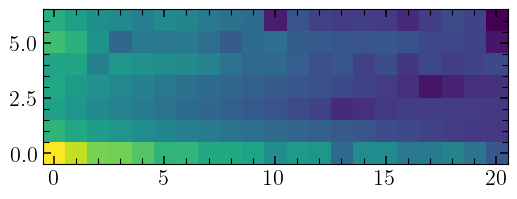

In [43]:
plt.imshow(np.log10(np.abs(v23_L2M10_Snlm[:,:,0])).T, origin='lower')

/tmp/ipykernel_736494/2041113353.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(np.abs(v23_L2M10_Tnlm[:,:,3])).T, origin='lower')


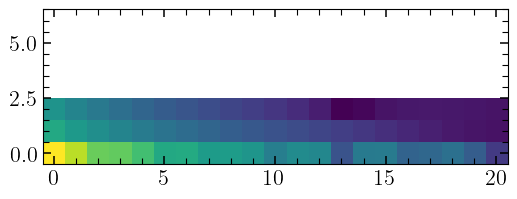

In [44]:
plt.imshow(np.log10(np.abs(v23_L2M10_Tnlm[:,:,3])).T, origin='lower')

In [ ]:
# AGAMA's  coefficients path 

In [83]:
lmc_traj = np.loadtxt('../../data/expansion/vasiliev23/L2M10/trajlmc.txt')

In [ ]:
mw_traj = np.loadtxt('../../data/expansion/vasiliev23/L2M10/trajlmc.txt')

In [76]:
lmc_pot = agama.Potential('../../data/expansion/vasiliev23/L2M10/lmc029.ini')
mw_pot = agama.Potential('../../data/expansion/vasiliev23/L2M10/mwhalo029.ini')

In [78]:
almc = lmc_pot.force(np.array([np.zeros(len(y_grid.flatten())), y_grid.flatten(), z_grid.flatten()]).T)

In [81]:
amw = mw_pot.force(np.array([np.zeros(len(y_grid.flatten())), y_grid.flatten(), z_grid.flatten()]).T)

In [79]:
np.shape(almc)

(90000, 3)